# Predicting Industrial Machine Downtime

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this first level, you're going to explore and describe the data. This level is aimed towards beginners. If you want to challenge yourself a bit more, check out level two!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 💪 Competition challenge

Create a report that covers the following:
1. What is the first and last date readings were taken on?
2. What is the average Torque?
3. Which assembly line has the highest readings of machine downtime?

In [54]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [55]:
# read the data and print the first few rows
machine_downtime = pd.read_csv('C://Users/Administrator/Documents/Data Science Projects/Machine-Downtime-Prediction/data/machine_downtime.csv')
machine_downtime.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


## Data Wrangling

In [56]:
# create a copy of the original data
machine_downtime_ori = machine_downtime.copy()

### 1. inconsistent data types and NaN values 
+ The `Date` column is type **object** instead of type **datetime**, We will also convert the `Assembly_Line_No` and `Downtime` from **Object** to **Category** typr
+ There are NaN values in majority of the columns. we need to do further analysis on that
+ The other column data types are okay


In [57]:
# get data types of columns
machine_downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

Looking at the plot below, there is no pattern to the missing values as they seem to be generally random.

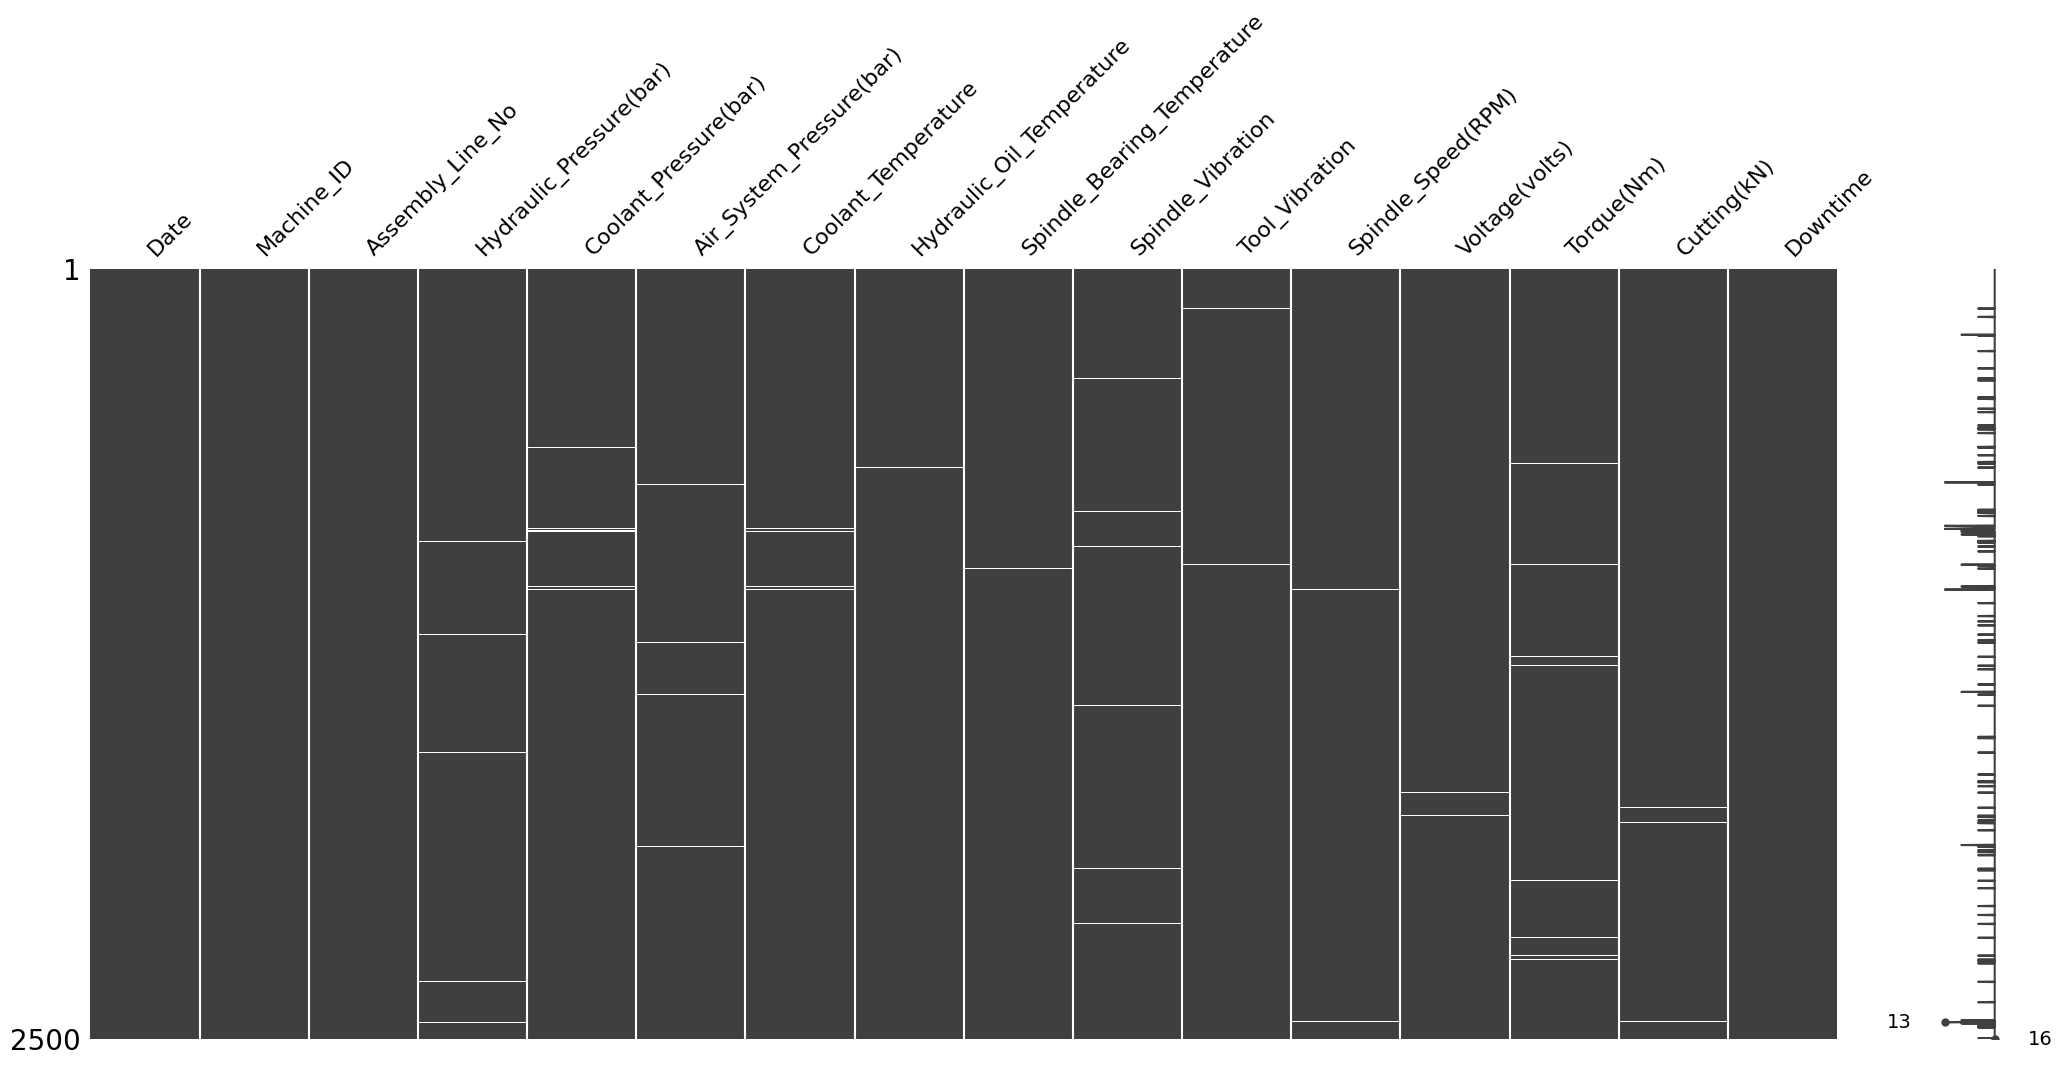

In [58]:
# plot the missing value matrix 
msno.matrix(machine_downtime_ori)
plt.show()

### 2. Value range constraint 
+ There are negative values in `Hydraulic_pressure` and `Spindle_Vibration` column. we will investigate that
+ We would convert the `cutting(kN)` SI unit column to **newton(N)** from **KiloNewton(kN)** and the `Spindle_Speed` from **Rotation per minute (RPM)** to **Rotation per seconds(RPS)** since all other variable are in their standard units
+ for the `Date` column, we will drill into it more during the data correction phase




In [59]:
# get the summray statistics of the data
machine_downtime_ori.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


### 3. Uniqueness Constraints
+ No spelling irregularities in the `Downtime` column
+ There are no duplicates present


In [60]:
# check the values of `downtime` column
machine_downtime_ori.Downtime.unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

In [61]:
# check for duplicates
duplicate_records = machine_downtime_ori.duplicated().sum()
print(f"the number of duplicate is {duplicate_records}")

the number of duplicate is 0


## Data Cleaning
We will be cleaning our data after performing some initial exploration. 

### 1.1 Change `Date` column to `datatime` type

+ We will convert the Date column data type from object type to datetime
+ There seems to be disparity in the arrangement of the records as they are not arranged in the right order. I will sort the dataframe by date column in ascending order. 


In [62]:
# change the date column to datetime
machine_downtime_ori['Date'] = pd.to_datetime(machine_downtime_ori['Date'],
                                              errors='coerce')
# verify 
machine_downtime_ori.Date.dtype

dtype('<M8[ns]')

Looking at the first few rows, the row with the min date value does not correspond to the first row and the same can be seen for the last row as it does not correspond the record with the max date value. we will address this

In [64]:
machine_downtime_ori.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [65]:
machine_downtime_ori.tail()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [66]:
# get the max date value
machine_downtime_ori.Date.max()

Timestamp('2022-07-03 00:00:00')

In [67]:
# get the min date value
machine_downtime_ori.Date.min()

Timestamp('2021-11-24 00:00:00')

In [68]:
# rearrange the dataframe based on the date column
machine_downtime_ori = machine_downtime_ori.sort_values(by = 'Date', ignore_index= True)
machine_downtime_ori.head()     # print the first few row to verify this

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-11-24,Makino-L3-Unit1-2015,Shopfloor-L3,88.640000,6.560332,6.210167,6.1,44.4,36.8,0.815,24.067,0.0,328.0,29.005529,2.26,Machine_Failure
1,2021-12-08,Makino-L2-Unit1-2015,Shopfloor-L2,141.159193,5.138601,6.127650,4.5,47.9,31.2,1.225,35.214,15217.0,381.0,23.091903,2.87,No_Machine_Failure
2,2021-12-17,Makino-L2-Unit1-2015,Shopfloor-L2,72.466020,5.141113,6.629322,21.7,47.5,35.8,1.078,29.198,17726.0,367.0,31.620335,2.97,No_Machine_Failure
3,2021-12-17,Makino-L1-Unit1-2013,Shopfloor-L1,88.280000,6.839413,6.560381,5.2,49.4,34.2,1.266,30.206,27957.0,340.0,15.900716,2.70,Machine_Failure
4,2021-12-17,Makino-L1-Unit1-2013,Shopfloor-L1,74.540000,6.580195,6.528837,24.4,48.1,36.6,0.778,25.048,27957.0,307.0,23.923929,3.59,Machine_Failure


We also have to convert the `Machine_ID`, `Downtime` and `Assembly_Line_No` from Object data type to categorical

In [69]:
# connvert the columns of object type to Category type
object_column = machine_downtime_ori.select_dtypes(include='object').columns
machine_downtime_ori[object_column] = machine_downtime_ori[object_column].astype('category')

# verufy 
machine_downtime_ori[object_column].dtypes

Machine_ID          category
Assembly_Line_No    category
Downtime            category
dtype: object

### 1.2 Imputing Missing Values

We will drill down on the NaN values to determine whether to impute or drop the NaN values
 

During data cleaning, I observed that for multiple measurement columns, NaN values appeared while corresponding values in other columns were present. This suggests that the missing values were due to sensor failures or an inability to record readings at those specific instances. Instead of handling each column separately, I systematically identified all measurement-related columns and imputed their NaN values with 0. This approach ensures consistency across the dataset while preserving the meaning behind the missing values.

## 💪 Competition challenge

Create a report that covers the following:
1. What is the first and last date readings were taken on?
2. What is the average Torque?
3. Which assembly line has the highest readings of machine downtime?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!